# BRFSS Smoking Behavior Analysis

### Overview 
This project analyzes US adult smoking behaviors using the 2023 BRFSS (Behavioral Risk Factor Surveillance System) dataset. The broader project spans Python, SQL, and Tableau, with Python serving as the main environment for exploratory analysis and visual development.

In this Python phase, I:

- Cleaned and prepared the raw BRFSS data for analysis

- Created visualizations to identify trends and outliers

- Generated export-ready datasets for SQL Analysis and Tableau dashboards 

The dataset used:
Source: BRFSS 2023 (Kaggle) https://www.kaggle.com/datasets/isuruprabath/brfss-2023-csv-dataset?resource=download

### Data Loading
I first imported Pandas and loaded the BRFSS dataset into a DataFrame. Then, I previewed the first few rows to get a sense of its structure. 

In [2]:
# Import pandas for dataset processing
import pandas as pd

# Load datset
df = pd.read_csv('/Users/Joanna/Downloads/BRFSS2023.csv') 

# Preview first 10 rows
df.head(10) 

,_state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,_psu,ctelenm1,...,drocdy4_,_rfbing6,_drnkwk2,_rfdrhv8,_flshot7,_pneumo3,_aidtst4,_rfseat2,_rfseat3,_drnkdrv
0,1,1,3012023,3,1,2023,1100,2023000001,2023000001,1.0,...,0,1,0,1,2.0,2.0,2.0,1,1,9
1,1,1,1062023,1,6,2023,1100,2023000002,2023000002,1.0,...,0,1,0,1,1.0,1.0,2.0,1,1,9
2,1,1,3082023,3,8,2023,1100,2023000003,2023000003,1.0,...,0,1,0,1,1.0,1.0,2.0,1,1,9
3,1,1,3062023,3,6,2023,1100,2023000004,2023000004,1.0,...,0,1,0,1,1.0,1.0,1.0,1,1,9
4,1,1,1062023,1,6,2023,1100,2023000005,2023000005,1.0,...,7,1,47,1,2.0,1.0,2.0,1,1,2
5,1,1,1092023,1,9,2023,1100,2023000006,2023000006,1.0,...,17,1,233,1,NaN,NaN,1.0,1,1,2
6,1,1,3212023,3,21,2023,1100,2023000007,2023000007,1.0,...,0,1,0,1,1.0,1.0,1.0,1,1,9
7,1,1,1062023,1,6,2023,1100,2023000008,2023000008,1.0,...,0,1,0,1,1.0,1.0,2.0,1,1,9
8,1,1,3152023,3,15,2023,1100,2023000009,2023000009,1.0,...,0,1,0,1,1.0,1.0,2.0,1,1,9
9,1,1,1082023,1,8,2023,1100,2023000010,2023000010,1.0,...,0,1,0,1,1.0,1.0,2.0,1,1,9


In [131]:
# Examine the number of rows annd columns
df.shape

(433323, 350)

The dataset has over 400,000 rows and 350 columns. Each row represents an individual survey response.

## Data Cleaning

### Check for duplicates

Although survey data may naturally contain repeated responses across categorical columns, I still checked for exact duplicate rows to ensures there are no unintended repeats or data entry errors


In [132]:
dupes = df[df.duplicated(keep=False)]
print(dupes)

Empty DataFrame
Columns: [_state, fmonth, idate, imonth, iday, iyear, dispcode, seqno, _psu, ctelenm1, pvtresd1, colghous, statere1, celphon1, ladult1, numadult, respslc1, landsex2, lndsxbrt, safetime, ctelnum1, cellfon5, cadult1, cellsex2, celsxbrt, pvtresd3, cclghous, cstate1, landline, hhadult, sexvar, genhlth, physhlth, menthlth, poorhlth, primins1, persdoc3, medcost1, checkup1, exerany2, exract12, exeroft1, exerhmm1, exract22, exeroft2, exerhmm2, strength, bphigh6, bpmeds1, cholchk3, toldhi3, cholmed3, cvdinfr4, cvdcrhd4, cvdstrk3, asthma3, asthnow, chcscnc1, chcocnc1, chccopd3, addepev3, chckdny2, havarth4, diabete4, diabage4, marital, educa, renthom1, numhhol4, numphon4, cpdemo1c, veteran3, employ1, children, income3, pregnant, weight2, height3, deaf, blind, decide, diffwalk, diffdres, diffalon, fall12mn, fallinj5, smoke100, smokday2, usenow3, ecignow2, alcday4, avedrnk3, drnk3ge5, maxdrnks, flushot7, flshtmy3, pneuvac4, shingle2, hivtst7, hivtstd3, ...]
Index: []

[0 rows x 350

An empty dataframe was returned, meaning there were no duplicates found in the dataset

### Column Selection
Using the BRFSS 2023 Codebook, I selected of a subset of meaningful columns to support a focused analysis of smoking patterns across key demographic components. Theses selected variables were used to create a smaller, more manageable DataFrame for analysis.

The selected columns and their descriptions are:

`_state`: Numerical identifier for the respondent’s state.

`sexvar`: Numerical identifier for sex (male/female).

`_ageg5yr`: Categorical age variable, with ages in 5 year bins

`_incomg1`: Categorical Income classification.

`_educag`: Categorical Edcucation level completed.

`_racegr3`: Five level race/ethnicity category.

`_smoker3`: Four-level smoking status: everyday smoker, someday smoker, former smoker, non-smoker.


In [3]:
selected_columns = ['_state', 'sexvar', '_ageg5yr', '_incomg1', '_educag', '_racegr3','_smoker3']
df_small = df[selected_columns].copy()

### Data Inspection

I inspected the dataset to understand its structure and check for missing values. I ensured that all columns were of the expected type and identified nulls to be addressed in the cleaning process.


In [134]:
# Check data types and non-null counts for selected columns
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _state    433323 non-null  int64  
 1   sexvar    433323 non-null  int64  
 2   _ageg5yr  433323 non-null  int64  
 3   _incomg1  433323 non-null  int64  
 4   _educag   433323 non-null  int64  
 5   _racegr3  433237 non-null  float64
 6   _smoker3  433323 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 23.1 MB


In [135]:
# Check the exact number of missing values per column
df_small.isnull().sum()

_state       0
sexvar       0
_ageg5yr     0
_incomg1     0
_educag      0
_racegr3    86
_smoker3     0
dtype: int64

The selected columns mostly have numeric data types. The `_racegr3` column has some missing values, which will need to be addressed. All other columns are complete. 

### Handling Missing Values
The `_racegr3` column has 86 missing values. This is a very small percentage of the total dataset (0.02%). We can remove the rows containing these values without significantly misrepresenting the dataset.

In [4]:
# Drop rows with missing values
df_small = df_small.dropna()

# Check if rows were properly dropped
df_small.isnull().sum()

_state      0
sexvar      0
_ageg5yr    0
_incomg1    0
_educag     0
_racegr3    0
_smoker3    0
dtype: int64

I checked for any other special values that needed to be treated as missing values.

In [137]:
# Obtain value counts for all columns
for col in ['_state', 'sexvar', '_ageg5yr', '_incomg1', '_educag', '_racegr3', '_smoker3']:
    print(f"Value counts for {col}:")
    print(df_small[col].value_counts().sort_index())
    print("\n")

Value counts for _state:
_state
1      4362
2      5522
4     12036
5      5346
6     11976
8      8780
9      9499
10     4282
11     3204
12    13245
13     8222
15     7832
16     6895
17     5279
18    10993
19     8876
20     9884
22     5388
23    12255
24    17255
25     9527
26     9973
27    16170
28     4069
29     7219
30     7143
31    12886
32     2650
33     6956
34     9328
35     3220
36    17348
37     4087
38     5745
39    13381
40     6727
41     6234
44     5774
45    10036
46     5886
47     5645
48    10058
49    11154
50     7636
51     6981
53    26414
54     4339
55    12819
56     4484
66     1559
72     4594
78     2064
Name: count, dtype: int64


Value counts for sexvar:
sexvar
1    203736
2    229501
Name: count, dtype: int64


Value counts for _ageg5yr:
_ageg5yr
1     26276
2     21246
3     24801
4     27142
5     28455
6     27068
7     31285
8     34216
9     41968
10    46090
11    43525
12    34534
13    38855
14     7776
Name: count, dtype: int64




I found that the column that will be used as our target variable, `_smoker3`, includes a category labeled 'Don't Know/Refused/Missing' (code 9). Given the importance of this variable to the analysis, I treated these responses as missing values and removed them. The values in this category make up only 0.05% of the data, so excluding them will not meaningfully affect the representativeness of the sample. 

Other demographic columns have code 9 as well, but they were preserved because they serve as supporting variables rather than the primary focus of the analysis. Keeping these responses better maintains the sample size and reflects the dataset’s true composition.

In [5]:
# Convert the code 9 into nulls
import numpy as np
df_small['_smoker3'] = df_small['_smoker3'].replace([9], np.nan)

# Drop the newly created null values
df_small = df_small.dropna()

# Check that the missing values were dropped 
print(df_small.isnull().sum())
print('\n')

# Check that the 9's were converted properly
print(df_small['_smoker3'].value_counts().sort_index())

_state      0
sexvar      0
_ageg5yr    0
_incomg1    0
_educag     0
_racegr3    0
_smoker3    0
dtype: int64


_smoker3
1.0     31764
2.0     13373
3.0    113109
4.0    251941
Name: count, dtype: int64


### Data Standardization
The BRFSS dataset uses numeric codes rather than descriptive labels. To make the data easier to interpret, I converted these codes into their corresponding labels.


In [10]:

# Recode the smoker column
df_small.loc[:, '_smoker3'] = df_small['_smoker3'].replace({
    1: 'Current smoker - every day',
    2: 'Current smoker - some days',
    3: 'Former smoker',
    4: 'Never smoked',
    9: 'Unknown'
}).astype('category')

# Recode the race column
df_small.loc[:, '_racegr3'] = df_small['_racegr3'].replace({
    1: 'White, Non-Hispanic',
    2: 'Black, Non-Hispanic',
    3: 'Other, Non-Hispanic',
    4: 'Multiracial, Non-Hispanic',
    5: 'Hispanic',
    9: 'Unknown'
}).astype('category')

# Recode the education column
df_small.loc[:, '_educag'] = df_small['_educag'].replace({
    1: 'Did not graduate High School',
    2: 'Graduated High School',
    3: 'Attended College/Technical school',
    4: 'Graduated College/Technical school',
    9: 'Unknown'
}).astype('category')

# Recode the income column
df_small.loc[:, '_incomg1'] = df_small['_incomg1'].replace({
    1: '<$15,000',
    2: '$15,000 - <$25,000',
    3: '$25,000 - <$35,000',
    4: '$35,000 - <$50,000',
    5: '$50,000 - <$100,000',
    6: '$100,000 - <$200,000',
    7: '$200,000+',
    9: 'Unknown'
}).astype('category')

# Recode the age column
df_small.loc[:, '_ageg5yr'] = df_small['_ageg5yr'].replace({
    1: '18 - 24',
    2: '25 - 29',
    3: '30 - 34',
    4: '35 - 39',
    5: '40 - 44',
    6: '45 - 49',
    7: '50 - 54',
    8: '55 - 59',
    9: '60 - 64',
    10: '65 - 69',
    11: '70 -74',
    12: '75 - 79',
    13: '80+',
    14: 'Unknown'
}).astype('category')

# Recode the sex column
df_small.loc[:, 'sexvar'] = df_small['sexvar'].replace({
    1: 'Male',
    2: 'Female'
}).astype('category')

# Recode the state column
df_small.loc[:, '_state'] = df_small['_state'].replace({
    1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California',
    8: 'Colorado', 9: 'Connecticut', 10: 'Delaware', 11: 'District of Columbia',
    12: 'Florida', 13: 'Georgia', 15: 'Hawaii', 16: 'Idaho', 17: 'Illinois',
    18: 'Indiana', 19: 'Iowa', 20: 'Kansas', 22: 'Louisiana',
    23: 'Maine', 24: 'Maryland', 25: 'Massachusetts', 26: 'Michigan', 27: 'Minnesota',
    28: 'Mississippi', 29: 'Missouri', 30: 'Montana', 31: 'Nebraska', 32: 'Nevada',
    33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico', 36: 'New York',
    37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio', 40: 'Oklahoma', 41: 'Oregon', 
    44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota',
    47: 'Tennessee', 48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia',
    53: 'Washington', 54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming',
    66: 'Guam', 72: 'Puerto Rico', 78: 'Virgin Islands'
}).astype('category')

# Check that the recoding was executed correctly
for col in ['_state', 'sexvar', '_ageg5yr', '_incomg1', '_educag', '_racegr3', '_smoker3']:
    print(f"Value counts for {col}:")
    print(df_small[col].value_counts().sort_index())
    print("\n")

Value counts for _state:
_state
Alabama                  4225
Alaska                   5295
Arizona                 11492
Arkansas                 5070
California              11127
Colorado                 8335
Connecticut              8845
Delaware                 4026
District of Columbia     3002
Florida                 12426
Georgia                  7632
Guam                     1468
Hawaii                   7510
Idaho                    6696
Illinois                 5044
Indiana                 10182
Iowa                     8557
Kansas                   9459
Louisiana                5027
Maine                   11679
Maryland                16181
Massachusetts            8875
Michigan                 9457
Minnesota               15053
Mississippi              3935
Missouri                 6960
Montana                  6923
Nebraska                12366
Nevada                   2531
New Hampshire            6645
New Jersey               8673
New Mexico               3071
New York

All categorical columns contain only expected categories and there were no inconsistencies in formatting or representation. 

No outlier check was needed for categorical columns, state codes, or age groups, as all values were within the expected range and matched predefined categories. 

### Feature Enginering

The `_state` variable is highly specific, so I created a column that groups states into broader regions to make geographic pattern easier to analyze.

In [11]:
# Create new region column based on the state column
df_small['region'] = df_small['_state']

# Define the region each state belongs to
Northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 
             'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']

Midwest = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
           'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']
South = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina',
         'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee',
         'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']

West = ['Arizona', 'California', 'Colorado', 'Idaho', 'Montana', 'Nevada', 
        'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming', 'Hawaii', 'Alaska']

Territories = ['Guam', 'Puerto Rico', 'Virgin Islands', 'District of Columbia']

# Define a function to assign the states to a regions
def state_to_region(state):
    if state in Northeast:
        return 'Northeast'
    elif state in Midwest:
        return 'Midwest'
    elif state in South:
        return 'South'
    elif state in West:
        return 'West'
    elif state in Territories:
        return 'Territory'
    else:
        return 'Other'
    
df_small.loc[:, 'region'] = df_small['_state'].apply(state_to_region)

df_small['region'].value_counts()


region
Midwest      112542
West         109312
South        103730
Northeast     73637
Territory     10966
Name: count, dtype: int64

The dataset is now ready for analysis. I exported the cleaned dataset to be used in other tools.

In [141]:
# Export cleaned file to csv
df_small.to_csv("cleaned_brfss2023.csv", index=False)

## Data Visualization
I began by creating a pie chart for the distribution of smoking status for the entire dataset.

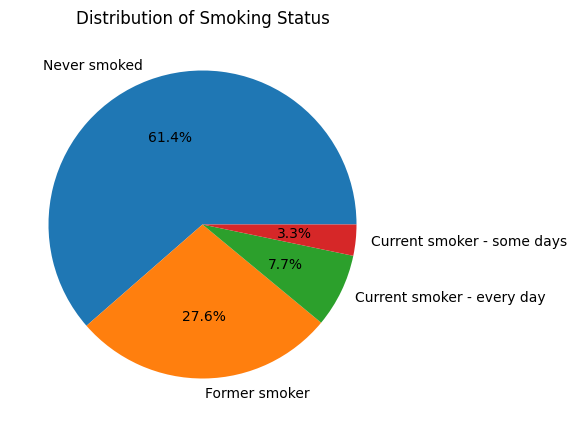

In [12]:
import matplotlib.pyplot as plt

# Count of each category
smoker_counts = df_small['_smoker3'].value_counts()

# Plot pie chart
plt.figure(figsize=(5, 5))

plt.pie(
    smoker_counts,
    labels=smoker_counts.index,
    autopct='%1.1f%%'
)

plt.title('Distribution of Smoking Status')

plt.show()

The pie chart shows that a majority of survey respondents have never smoked. Forner smokers make up the second largest group. Among current smokers, everyday smoking is more common than smoking only on some days.

I next plotted a bar graph of smoking status by education level.

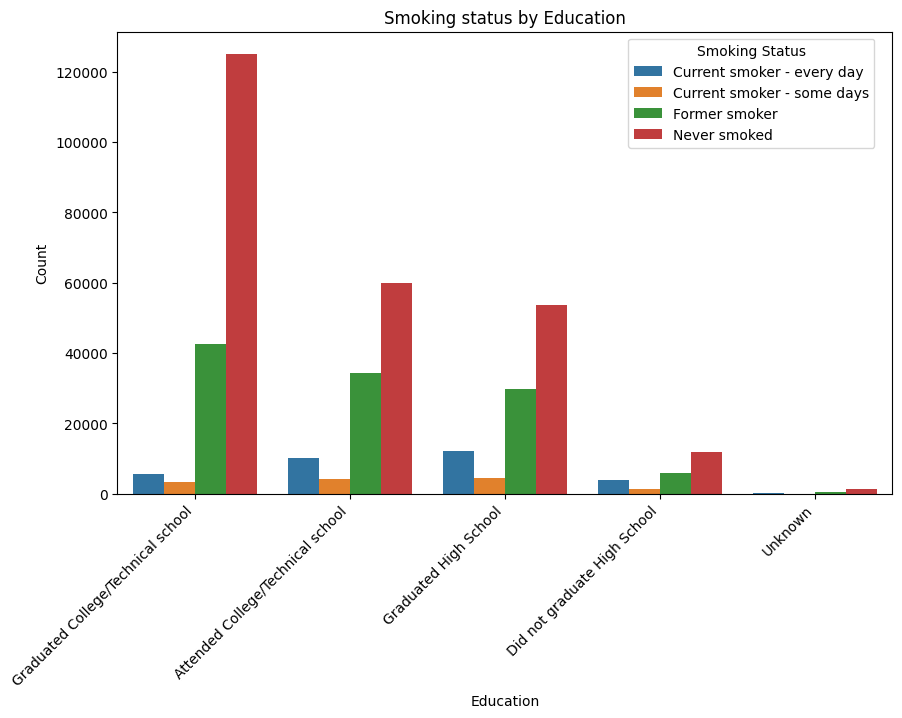

In [ ]:
# Plot bar graph
plt.figure(figsize=(10, 6))
sns.countplot(x='_educag', hue='_smoker3', data=df_small,
              order=df_small['_educag'].value_counts().index)
plt.title('Smoking status by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Smoking Status', bbox_to_anchor=(0.65, 1), loc= 'upper left')
plt.show()

I realized that using raw counts of smoking status could give a misleading impression. Since some education categories have significantly more respondents than others, larger groups would naturally show higher counts regardless of smoking behavior. Converting counts to percentages within each education group provides a more accurate comparison of smoking patterns.

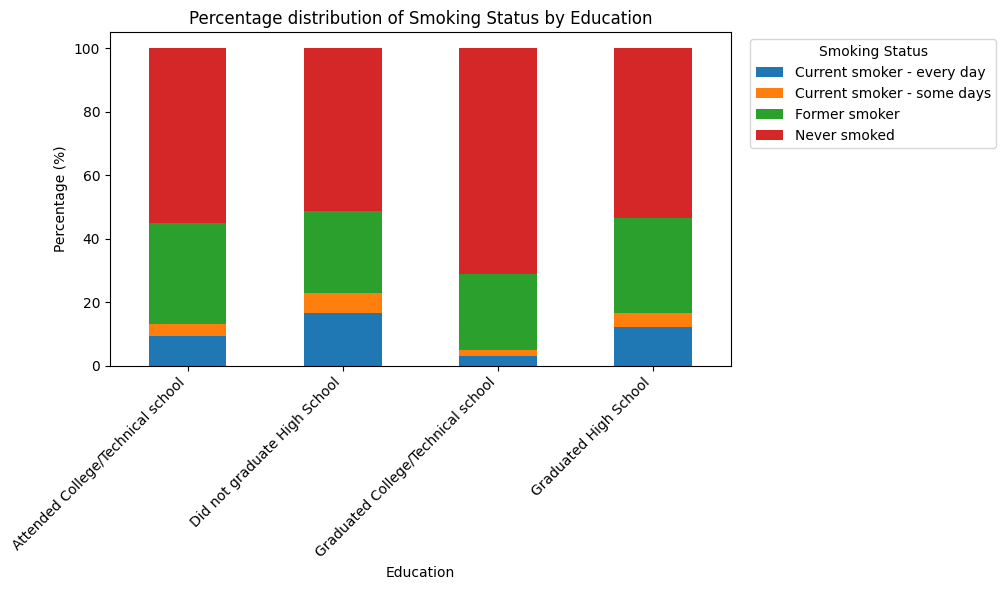

In [ ]:
# Compute counts then percentage within each education category
edu_counts = df_small.groupby(['_educag', '_smoker3']).size().unstack(fill_value=0)

# Drop unknowns for bar chart clarity
edu_counts = edu_counts.drop(index = 'Unknown')
edu_pct = edu_counts.div(edu_counts.sum(axis=1), axis=0) * 100

# Plot stacked percentage bars
ax = edu_pct.plot(kind='bar', stacked=True, figsize=(10,6))
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Education')
plt.title('Percentage distribution of Smoking Status by Education')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Smoking Status', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

From this stacked bar chart, the distribution of smoking status appears to be more consistent across education levels than than suggested by the raw count-based bar chart. Using percentages provides a more accurate comparison because by adjusting for differences in group size. The chart highlights that current smokers are more common among individuals who did not graduate high school and least common among those who graduated college/technical school. The proportion of people who have never smoked grows steadily with increasing education. Unknown responses were excluded to avoid skewing the comparisons.

In [15]:
# Function to replicate percentage plot for other categories
def plot_smoking_by_category(df, category_col, category_order = None):
    counts = df_small.groupby([category_col, '_smoker3']).size().unstack(fill_value=0).drop(index="Unknown", errors="ignore")

    if category_order is not None:
        counts  = counts.reindex(category_order)

    pct = counts.div(counts.sum(axis=1), axis=0) * 100

    pct.plot(kind='bar', stacked=True, figsize=(12,6))
    plt.title(f'Percentage Distribution of Smoking Status by {category_col}')
    plt.ylabel('Percentage')
    plt.xlabel(category_col)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Smoking Status', bbox_to_anchor=(1.02, 1), loc='upper left', prop={'size': 8})
    plt.show()

In [16]:
income_order = [
    '<$15,000',
    '$15,000 - <$25,000',
    '$25,000 - <$35,000',
    '$35,000 - <$50,000',
    '$50,000 - <$100,000',
    '$100,000 - <$200,000',
    '$200,000+',
    'Unknown']

df_small['_incomg1'] = pd.Categorical(df_small['_incomg1'], 
                                      categories=income_order, 
                                      ordered=True)

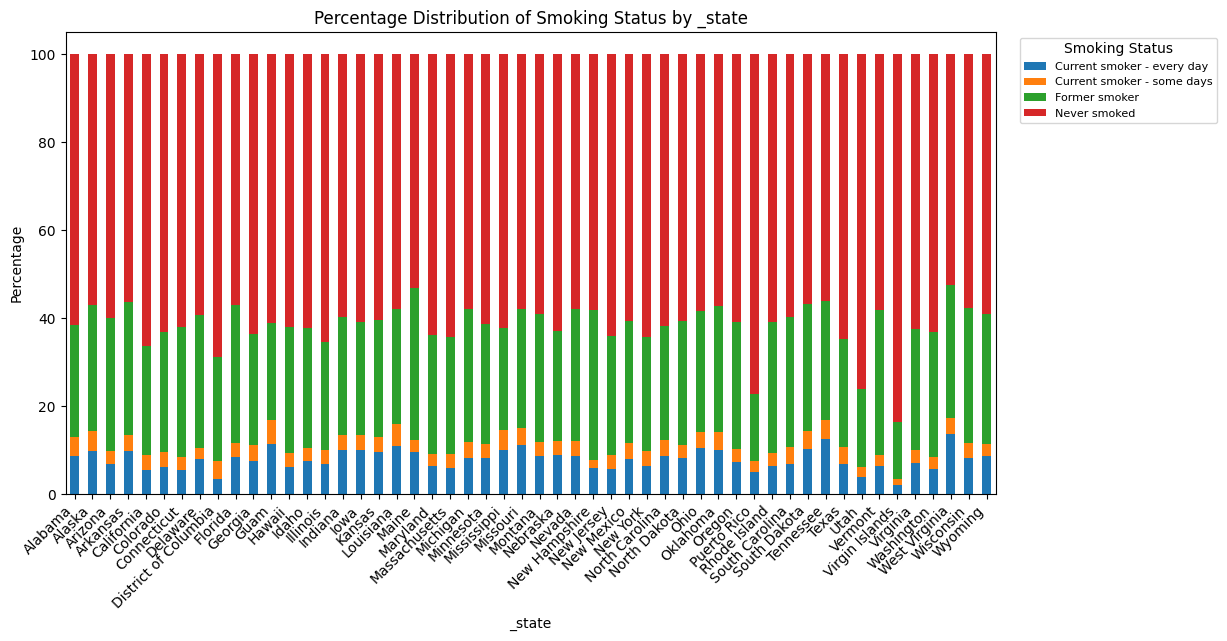

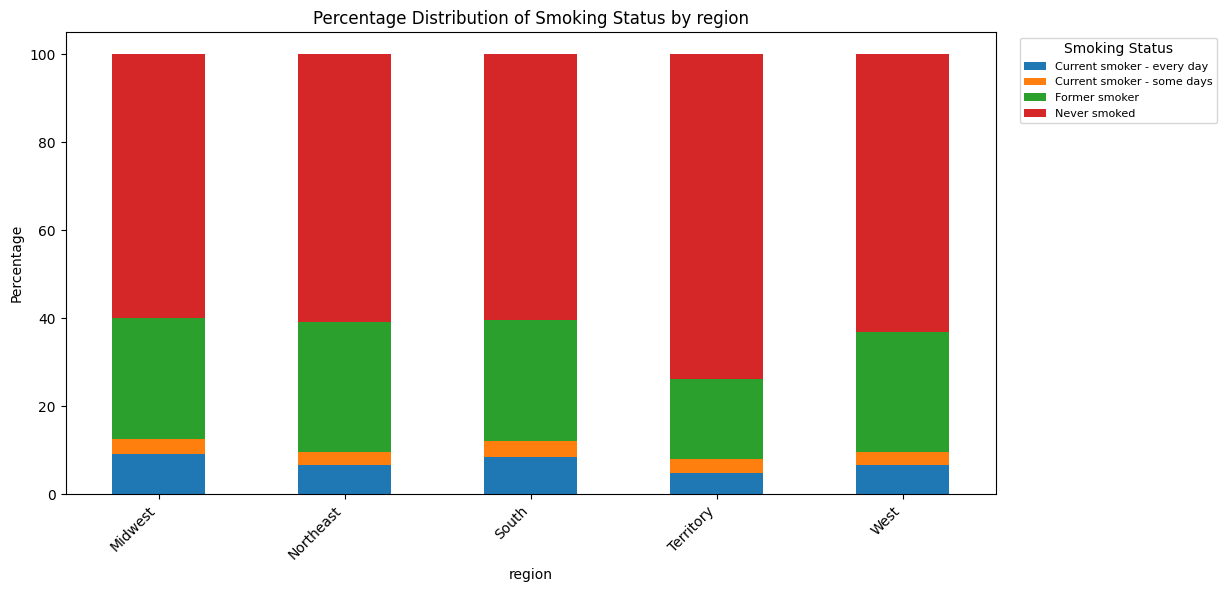

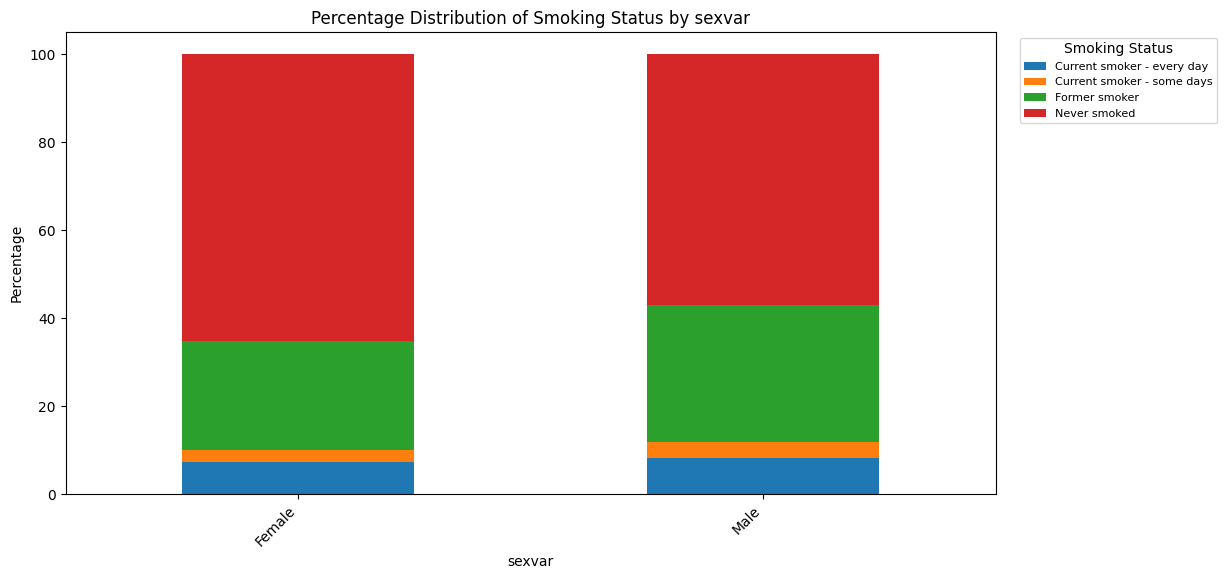

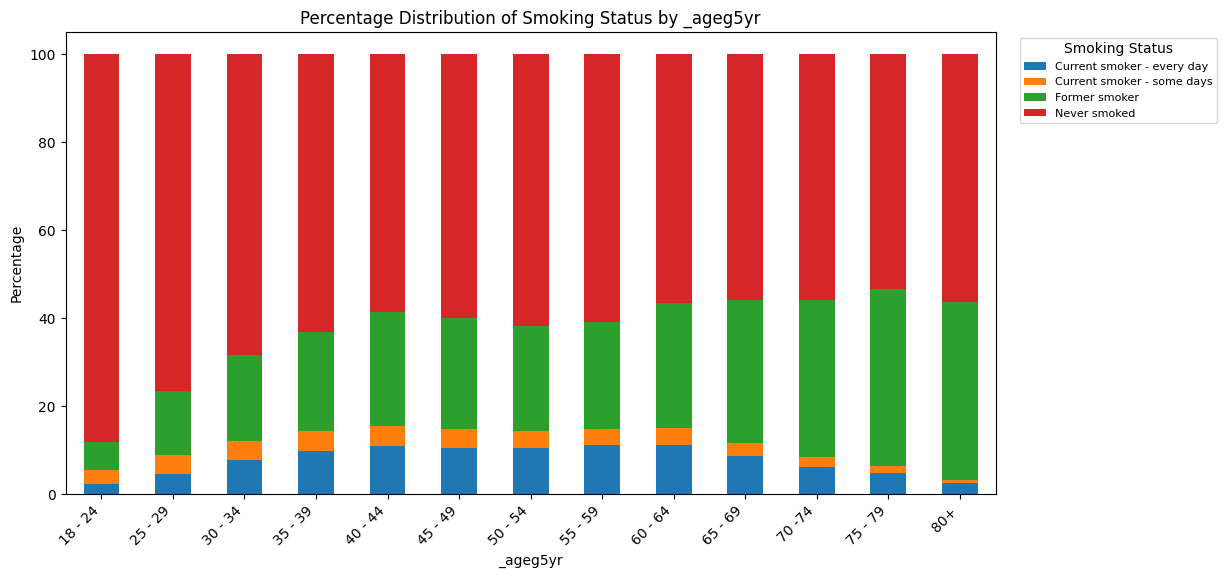

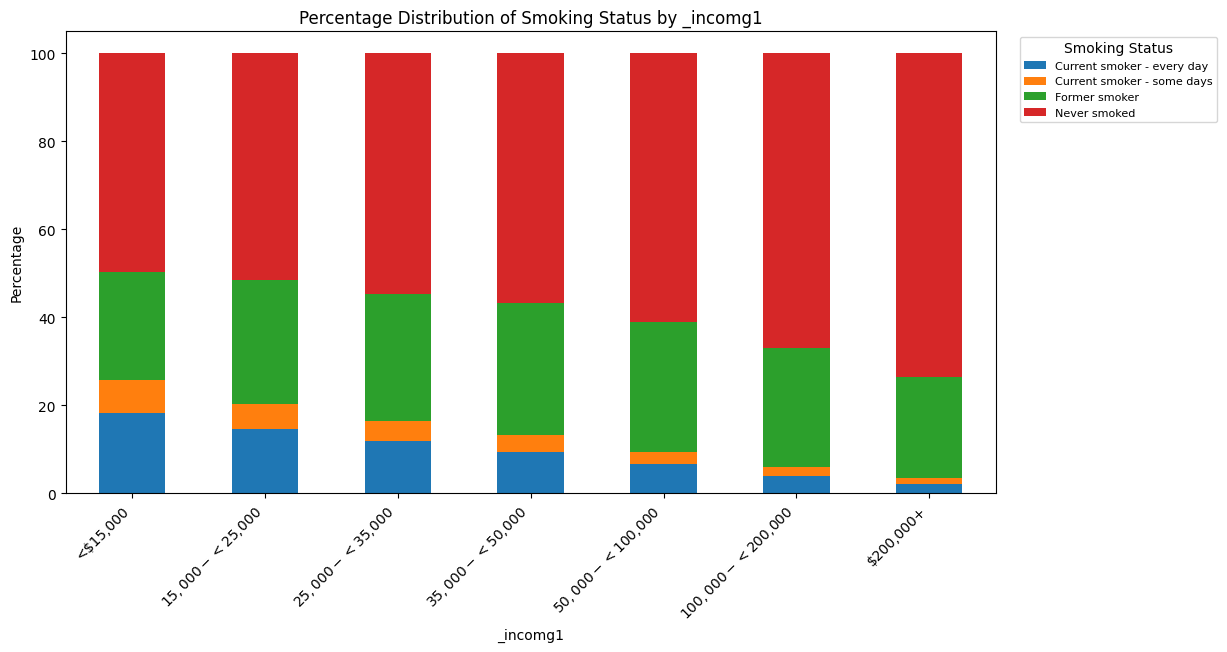

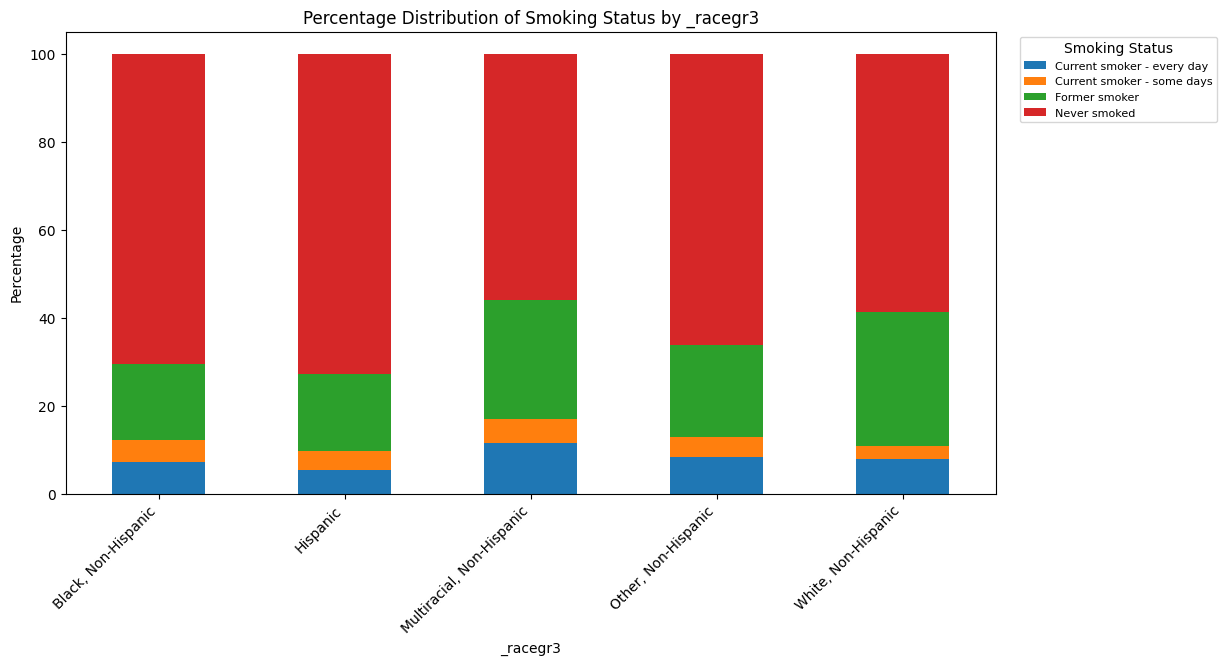

In [17]:
for col in ['_state', 'region', 'sexvar', '_ageg5yr', '_incomg1', '_racegr3']:
     plot_smoking_by_category(df_small, col)

#### Smoking Status by Demographic Variables

I explored the distribution of smoking status across several demographic variables using stacked percentage bar charts. 

**State and Region:**

- The highest percentages of individuals who have never smoked are observed in the Virgin Islands, Puerto Rico, and Utah.

- West Virginia, Tennessee, and Guam have the highest percentages of current smokers.

- When comparing regions collectively, the proportions of “Never smoked” are largely similar, with U.S. territories showing slightly higher percentages.

- The South and Midwest regions display slightly higher percentages of current smokers relative to other regions.

**Sex:**

- Females have a higher proportion of respondents who have never smoked compared to males.

- Males have a slightly higher proportion of current smokers, highlighting a gender difference in smoking patterns.

**Age:**

- Current smoking rates show a bell-shaped distribution across age groups, peaking between the 40s and 60s.

- The youngest group (ages 18–24) has the highest percentage of individuals who have never smoked.

- The proportion of “Never smoked” decreases steadily until the 40s age range, then remains mostly flat in older age groups.

**Income:**

- There is a clear income-related pattern: higher income levels are associated with higher percentages of respondents who have never smoked.

- Conversely, current smoking decreases as income increases, suggesting a potential relationship between socioeconomic status and smoking behavior.

**Race/Ethnicity:**

- Hispanic respondents have the lowest rates of current smoking, while multiracial non-Hispanic respondents have the highest.

- The highest percentages of “Never smoked” are observed among Hispanic and Black non-Hispanic respondents.

- Multiracial non-Hispanics and White non-Hispanics show lower proportions of “Never smoked.”

#### Bivariate Analysis
Education and income were selected for a combined multivariate visualization because they are closely related socioeconomic factors that often interact. Both variables showed strong and consistent patterns with smoking when analyzed individually, making them good candidates for a deeper combined analysis.

Instead of creating multiple multivariate charts—which can quickly become complex and harder to interpret—this project includes one focused multivariate visualization to highlight how smoking status varies at the intersection of education and income. This approach keeps the analysis interpretable while still demonstrating how demographic factors can interact to influence smoking patterns.

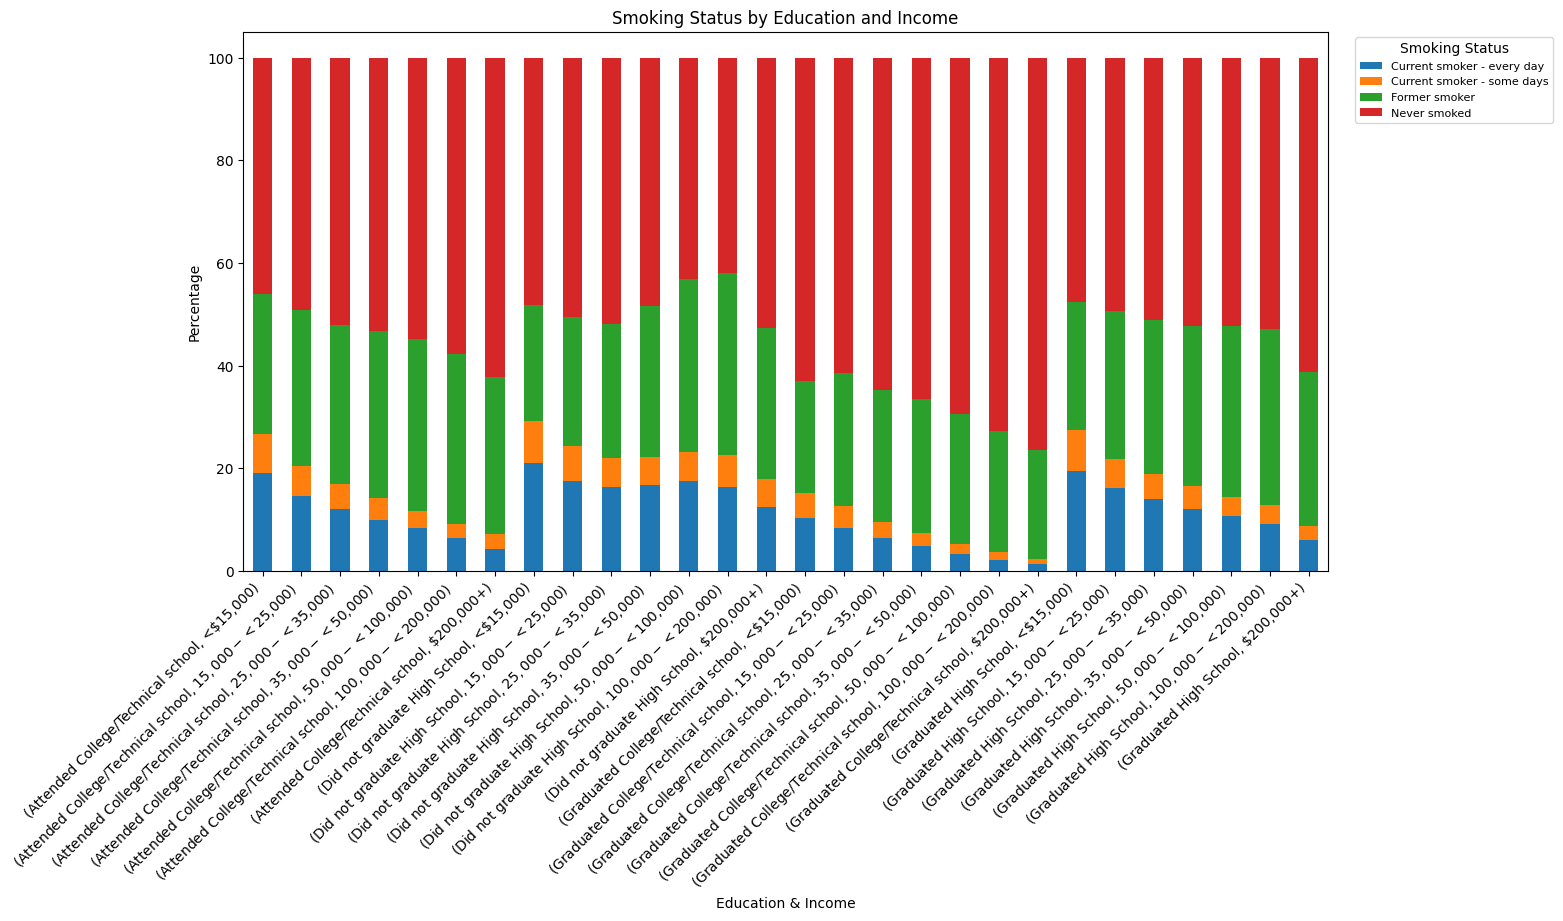

In [114]:
# Filter out Unknowns
df_filtered = df_small.loc[
    (df_small['_educag'] != 'Unknown') & 
    (df_small['_incomg1'] != 'Unknown')
]

# Create percentages crosstab
edu_income_pct = pd.crosstab(
    [df_filtered['_educag'], df_filtered['_incomg1']],  
    df_filtered['_smoker3'],                         
    normalize='index'
) * 100

# Plot
edu_income_pct.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Smoking Status by Education and Income')
plt.ylabel('Percentage')
plt.xlabel('Education & Income')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Smoking Status', bbox_to_anchor=(1.02,1), loc='upper left', prop={'size':8})
plt.show()

#### Smoking Patterns by Education and Income

**Education plays a strong role overall:**
- Individuals with lower educational attainment consistently show higher rates of current smoking, while those with higher education show the lowest rates.

**Income gradients appear within every education level:**
- Across all education groups, the lowest income bracket has the highest percentage of current smokers, and smoking rates generally decline as income increases.

**Strength of the income effect varies by education:**

- For those who did not graduate high school, smoking rates are highest in the lowest income group and lowest in the highest income group, though middle income brackets show relatively similar levels.

- Smoking rates are very similar in the lowest income bracket for individuals with the two lowest education levels (“Did not graduate high school” and “Graduated high school”), suggesting that income may overshadow education at the lowest socioeconomic tier, and that the education effect is weaker within this income group.

- Among individuals who graduated high school and beyond, the income gradient becomes sharper—current smoking declines steadily and noticeably as income rises.


**Combined effect:**
- The highest smoking rates overall are found among respondents who both have low education and low income, while the lowest rates appear among those with higher education and higher income.

- This multivariate view makes it clear that both education and income independently and jointly contribute to smoking prevalence, with the strongest smoking burden falling on groups with fewer socioeconomic resources.